# 📧 AI-Powered Email Threat Detection  
### **Using Machine Learning to Identify Spam and Phishing Emails**  

## 🚀 **Project Overview**  
Email security is critical in today’s digital world, where phishing attacks, spam, and malicious emails pose significant risks. This project applies **Machine Learning (ML) and Large Language Models (LLMs)** to analyze email content and classify messages as **Spam or Safe**.  

## 🔍 **Key Features**  
✔️ **AI-Based Spam Classification**: Uses ML models to detect spam, phishing, and fraudulent emails.  
✔️ **Feature Engineering**: Extracts key features such as **spam words, suspicious links, attachments, and sender reputation**.  
✔️ **Automated Labeling**: Implements rule-based filtering to pre-label data before training.  
✔️ **Supports Google Workspace**: Designed to work seamlessly with Gmail and other providers.  
✔️ **Interactive UI**: A **Streamlit/React-based frontend** for real-time spam detection.  

## 🛠 **Technologies Used**  
- **Python** (Data Processing & ML)  
- **Pandas & NumPy** (Data Handling)  
- **Scikit-Learn & XGBoost** (Machine Learning)  
- **NLP Techniques** (Text Preprocessing)  
- **Google Gmail API** (Email Integration)  
- **Flask/FastAPI** (Backend API)  
- **React/Streamlit** (Frontend UI)  

## 📌 **Workflow**  
1️⃣ **Data Preprocessing**: Clean and extract features from raw email data.  
2️⃣ **Automated Labeling**: Apply rule-based techniques to classify emails.  
3️⃣ **Train Machine Learning Model**: Use Logistic Regression, Random Forest, or XGBoost.  
4️⃣ **Evaluate Performance**: Assess accuracy, precision, recall, and F1-score.  
5️⃣ **Deploy Model via API**: Flask/FastAPI backend to serve predictions.  
6️⃣ **User Interface**: Web-based spam detection tool for real-time analysis.  

## 📂 **Notebook Sections**  
🔹 **1. Data Collection & Cleaning**  
🔹 **2. Feature Extraction & Engineering**  
🔹 **3. Rule-Based Labeling**  
🔹 **4. Model Training & Evaluation**  
🔹 **5. Deployment & API Integration**  

---

💡 **Goal:** To build an effective, real-time email spam detection system that enhances security and prevents cyber threats.  

🔬 **Author:** _[Your Name]_  
📅 **Date:** _[YYYY-MM-DD]_  


## 📂 Efficient Large File Processing with Pandas  

### **🔍 Overview**  
When dealing with large datasets, loading the entire file at once can cause **memory issues**. This approach **reads the dataset in chunks**, allowing us to process large files efficiently.  

### **🛠 Code Breakdown**  
- **`chunk_size = 150000`** → Reads **150,000 rows at a time** to optimize memory usage.  
- **`pd.read_csv(file_path, chunksize=chunk_size)`** → Iterates through the dataset **in chunks** instead of loading everything at once.  
- **`break` (temporary)** → Stops after reading the **first chunk** for testing.  

### **🚀 Why Use Chunking?**  
✔ Prevents **memory overload** when handling large CSV files.  
✔ Enables **real-time processing** without crashes.  
✔ Allows **scalable data handling** for big datasets.  

💡 **Next Step:** Remove `break` when ready to process all chunks! 🚀


In [3]:
import pandas as pd

In [1]:
import pandas as pd

# Define chunk size (e.g., 10,000 rows at a time)
chunk_size = 150000
file_path = "../data/emails.csv"

# Read in chunks and process each part separately
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # print(chunk.info())
    email_df = chunk
    print("Email Dataset is ready to be processed")
    break  # Remove this once you're ready to process all chunks


Email Dataset is ready to be processed


**Shape of the email dataset to use**

In [30]:
email_df.shape

(150000, 2)

## Information about the email dataset

In [29]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     150000 non-null  object
 1   message  150000 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


## 📩 Extracting Email Headers & Body  

### 🔍 Overview  
This function processes **raw email text** to extract key **headers** (such as sender, recipient, subject, and date) and retrieve the **email body** for analysis. It is designed to handle **multipart emails**, ensuring that only the readable text content is extracted while ignoring attachments.

### ⚡ Key Features  
✔ **Extracts Important Headers** – Captures key details like `From`, `To`, `Subject`, and `Date`.  
✔ **Handles Multipart Emails** – Supports structured email formats that contain different content types.  
✔ **Skips Attachments** – Ensures that non-text attachments (e.g., PDFs, images) are not mistakenly extracted.  
✔ **Ensures Encoding Compatibility** – Converts email content to a readable format using appropriate character encoding.  

### 🚀 Why This is Important?  
- Essential for **email spam detection** and **phishing analysis**.  
- Helps in **preprocessing raw emails** for **machine learning classification**.  
- Allows structured analysis of email metadata and message content.  

💡 **Next Step:** Use this function to process email datasets and extract structured insights for analysis! 🚀  


In [26]:
from email import message_from_string

def extract_headers(email_text):
    '''
    Extracts email headers from raw text

    Parameters:
        email_text (str): Raw email text

    Returns:
        dict: Extracted email headers
    '''
    msg = message_from_string(email_text)
    
    # Extracting headers
    email_data = {
        "from": msg["From"],
        "to": msg["To"],
        "subject": msg["Subject"],
        "date": msg["Date"],
        "body": None  # Default to None if body extraction fails
    }
    
    # Extract email body (handling different content types)
    if msg.is_multipart():
        for part in msg.walk():
            content_type = part.get_content_type()
            content_disposition = str(part.get("Content-Disposition"))
            
            # Select only text/plain (ignore attachments)
            if content_type == "text/plain" and "attachment" not in content_disposition:
                charset = part.get_content_charset() or "utf-8"  # Default to utf-8 if None
                email_data["body"] = part.get_payload(decode=True).decode(charset, errors="ignore")
                break  # Stop at first valid body
    else:
        charset = msg.get_content_charset() or "utf-8"  # Default encoding
        email_data["body"] = msg.get_payload(decode=True).decode(charset, errors="ignore")
    
    return email_data

## 🔢 Word Count Function  

### 🔍 Overview  
This function counts the total number of **words** in a given text. It uses **regular expressions (regex)** to correctly identify words, ensuring accurate results even when handling punctuation or special characters.

### ⚡ Key Features  
✔ **Accurate Word Extraction** – Identifies words using regex, avoiding incorrect splits due to punctuation.  
✔ **Optimized for Text Analysis** – Helps in processing email content for **spam detection and NLP tasks**.  
✔ **Lightweight & Efficient** – Works on large text bodies with minimal computational overhead.  

### 🚀 Why This is Important?  
- Used for **email spam filtering** (e.g., spam emails often have shorter or longer word counts).  
- Helps in **text complexity analysis** for NLP tasks.  
- Useful for **feature engineering** in machine learning models.  

💡 **Next Step:** Apply this function to analyze **email datasets** and extract meaningful word count patterns! 🚀  


In [25]:
import re
def count_words(text):
    '''Counts the number of words in a text'''
    words = re.findall(r"\b\w+\b", text)  # Extracts words correctly
    return len(words)


## 🔗 Counting Links & Domains in Text  

### 🔍 Overview  
This function detects and counts both **full URLs** and **plain domain mentions** in a given text. It ensures accurate identification of web links, which is crucial for **spam detection and email security analysis**.

### ⚡ Key Features  
✔ **Detects Full URLs** – Captures links starting with `http://` or `https://`.  
✔ **Identifies Plain Domains** – Extracts domain mentions like `example.com` even without `http://`.  
✔ **Removes Duplicates** – Uses a **set-based approach** to ensure each URL/domain is counted only once.  

### 🚀 Why This is Important?  
- **Spam & Phishing Detection** – Suspicious emails often contain **multiple links or fake domains**.  
- **Feature Engineering for ML** – The number of links in an email can be a key feature in **spam classification**.  
- **Cybersecurity Analysis** – Helps detect **malicious domains** in emails.  

💡 **Next Step:** Use this function to analyze email datasets and detect **potentially harmful URLs or phishing links**! 🚀  


In [24]:
def count_links_and_domains(text):
    """Counts both full URLs and plain domain mentions."""
    url_pattern = r"https?://[^\s<>\"']+"  # Full URLs
    domain_pattern = r"\b(?:[a-zA-Z0-9-]+\.)+[a-zA-Z]{2,6}\b"  # Plain domains

    urls = re.findall(url_pattern, text)
    domains = re.findall(domain_pattern, text)

    return len(set(urls + domains))  # Using `set()` to remove duplicates


## 🖥️ Detecting HTML Content in Emails  

### 🔍 Overview  
This function checks whether an **email contains an HTML part**. Many **phishing and spam emails** use HTML formatting to hide malicious links, deceptive content, or tracking elements.

### ⚡ Key Features  
✔ **Scans Email Structure** – Iterates through all parts of the email to detect HTML content.  
✔ **Phishing Detection** – HTML emails often include **hidden links** or **obfuscated text** used in phishing attacks.  
✔ **Enhances Email Classification** – HTML presence can be a strong feature in **spam detection models**.  

### 🚀 Why This is Important?  
- **Spam & Phishing Emails** often use **HTML formatting** for deceptive styling.  
- HTML emails can include **hidden tracking pixels** or **JavaScript exploits**.  
- Helps **improve machine learning models** by identifying emails with HTML content.  

💡 **Next Step:** Use this function to analyze email datasets and detect **potentially harmful HTML-based emails**! 🚀  


In [23]:
def has_html(email_text):
    """Check if an email contains an HTML part."""
    msg = message_from_string(email_text)
    
    return any(part.get_content_type() == "text/html" for part in msg.walk())



**A typical example of an email content**

In [22]:
email_content = '''Message-ID: <12345678.987654321@example.com>
Date: Mon, 19 Feb 2024 10:30:00 -0700
From: sender@example.com
To: recipient@example.com
Subject: Project Proposal
Mime-Version: 1.0
Content-Type: multipart/mixed; boundary="boundary123"

--boundary123
Content-Type: text/plain; charset="UTF-8"
Content-Transfer-Encoding: 7bit

Hello,

Please find attached the project proposal document. Let me know if you have any questions.

Best,
Sender

--boundary123
Content-Type: application/pdf
Content-Disposition: attachment; filename="proposal.pdf"
Content-Transfer-Encoding: base64

JVBERi0xLjQKJeLjz9MKMyAwIG9iago8PAovVHlwZSAvQ2F0YWxvZwovUGFnZXMgMiAwIFIKPj4KZW5kb2Jq
... (truncated base64 content) ...
==

--boundary123--
'''

## 📎 Counting Attachments in Emails  

### 🔍 Overview  
This function counts the **number of attachments** in an email by scanning its structure and identifying parts that contain filenames. Attachments are often used in **phishing attacks and malware distribution**, making this a crucial feature for **spam detection**.

### ⚡ Key Features  
✔ **Detects All Attachments** – Identifies file attachments regardless of format (PDF, ZIP, EXE, etc.).  
✔ **Enhances Email Threat Analysis** – Helps flag emails with **suspicious attachments**.  
✔ **Supports Email Parsing** – Works with **multipart emails**, ensuring accurate detection.  

### 🚀 Why This is Important?  
- **Phishing & Malware Detection** – Many malicious emails contain **infected attachments**.  
- **Spam Classification** – Emails with attachments may have a **higher likelihood of being spam**.  
- **Security Analysis** – Helps detect **potential threats** before opening an email.  

💡 **Next Step:** Use this function to extract **attachment statistics** from emails and integrate it into your **machine learning model** for improved spam detection! 🚀  


In [21]:
def count_attachments(email_text):
    """Count the number of attachments in an email."""
    msg = message_from_string(email_text)
    
    return sum(1 for part in msg.walk() if part.get_filename())  # Count parts that have a filename


## 📊 Spam Score Calculation  

### 🔍 Overview  
This function calculates a **spam score** for a given text by checking for **common spam-related keywords**. The presence of these words increases the likelihood that an email is spam.

### ⚡ Key Features  
✔ **Comprehensive Spam Keyword List** – Detects **financial scams, phishing attempts, urgent promotions, and more**.  
✔ **Regex-Based Matching** – Ensures **accurate word detection**, preventing partial word matches.  
✔ **Quantitative Spam Score** – Higher scores indicate a **greater likelihood of spam**.  

### 🚀 Why This is Important?  
- **Spam & Phishing Detection** – Many fraudulent emails contain **trigger words** to manipulate recipients.  
- **Feature Engineering for ML Models** – Spam score can serve as an **important feature in a spam classifier**.  
- **Automated Email Filtering** – Helps categorize emails based on **risk level**.  

💡 **Next Step:** Use this function to **analyze email datasets**, refine spam detection models, and test different thresholds for **classification accuracy**! 🚀  


In [20]:
def spam_score(text):
    """Calculate the spam score based on predefined spam words."""
    SPAM_WORDS = [
    # 🚨 Financial & Money Scams
    "free", "win", "winner", "winnings", "money", "cash", "earn", "easy money",
    "make money", "fast cash", "quick cash", "extra cash", "double your income",
    "get rich", "financial freedom", "increase sales", "investment", 
    "passive income", "work from home", "no experience needed", "limited time",
    "instant cash", "credit", "debt relief", "bank transfer", "wire transfer", 
    "fast loan", "no credit check", "lowest rate", "instant approval",
    
    # 🛍️ Promotional & Sales Tactics
    "offer", "discount", "prize", "reward", "bonus", "gift", "apply now",
    "special deal", "hot deal", "lowest price", "save big", "best deal", 
    "bargain", "buy now", "order now", "cheap", "affordable", "best price", 
    "exclusive", "promo", "promotion", "limited offer", "free trial", 
    "new customer", "subscription", "membership", "act fast", "expires soon",

    # 🚀 Urgency & Persuasion
    "urgent", "hurry", "act now", "last chance", "final notice", "important", 
    "as soon as possible", "time-sensitive", "one-time", "today only", 
    "do it now", "limited stock", "this won’t last", "once in a lifetime",
    
    # 🎯 Clickbait & Phishing Attempts
    "click", "click here", "click below", "open now", "access now",
    "view online", "sign up", "register now", "confirm your details",
    "log in", "update your account", "verify your identity", 
    "secure your account", "your account is at risk", "security alert", 
    "reset password", "your payment failed", "billing issue", "invoice attached",
    
    # ⚠️ Scam & Fraud Terms
    "guarantee", "risk-free", "no risk", "100% free", "money-back", 
    "satisfaction guaranteed", "no obligation", "hidden charges", 
    "secret formula", "miracle", "exclusive deal", "instant cure", 
    "congratulations", "you have been selected", "you are a winner",
    
    # 📩 Email & Unsubscription Traps
    "unsubscribe", "remove me", "opt-out", "this is not spam",
    "why are you receiving this", "you received this email because",
    "not interested?", "spam-free guarantee", "no more emails",
    
    # 🏦 Banking & Crypto Fraud
    "bitcoin", "crypto", "blockchain", "ethereum", "trading", "forex", 
    "broker", "binary options", "wallet", "crypto exchange", "payout", 
    "account verification", "account update", "account locked", "secure login",
    
    # 📢 Medical & Health Scams
    "miracle cure", "cure", "no prescription", "pharmacy", "drugs", 
    "weight loss", "diet pill", "anti-aging", "instant results", "clinically proven",
    
    # 💳 Lottery & Sweepstakes
    "lottery", "jackpot", "lucky draw", "winning ticket", "unclaimed prize", 
    "claim your reward", "sweepstakes", "mega millions", "powerball", 
    "your lucky number", "your check is waiting",

    # 👔 Business & Job Scams
    "earn at home", "home-based business", "be your own boss", "online income",
    "startup funding", "government grant", "high-paying job", "no skills required",
    
    # 🏠 Real Estate & Property Scams
    "mortgage rates", "real estate", "home loan", "house for sale", 
    "foreclosure", "cheap property", "investment property", "flipping houses",
    
    # 🔐 Personal Information Theft
    "identity verification", "social security number", "ssn", "bank account", 
    "routing number", "password reset", "security question", "personal details",
    
    # 🖥️ Tech Support & Malware Scams
    "your computer is infected", "tech support", "fix your pc", "remote access",
    "download now", "install this update", "your system is at risk", 
    "trojan detected", "virus warning", "malware detected", "spyware removal",
    
    # 🎁 Fake Charity & Donations
    "help us", "donate now", "urgent donation needed", "support our cause", 
    "charity request", "nonprofit", "disaster relief", "emergency appeal",
    
    # 🏆 Fake Celebrities & Endorsements
    "as seen on tv", "elon musk recommends", "warren buffet’s secret", 
    "celebrity approved", "doctor recommended", "scientifically proven"
]

    text_lower = text.lower()
    
    return sum(len(re.findall(rf"\b{word}\b", text_lower)) for word in SPAM_WORDS)


## ⚠️ Detecting Suspicious Attachments in Emails  

### 🔍 Overview  
This function scans an email for **potentially dangerous attachments** by checking file extensions commonly associated with **malware, phishing attacks, and trojans**.

### ⚡ Key Features  
✔ **Detects High-Risk File Types** – Flags attachments like `.exe`, `.zip`, `.rar`, `.js`, `.bat`, etc.  
✔ **Prevents Malware Spread** – Helps identify emails that contain **potentially harmful executables**.  
✔ **Enhances Spam & Security Filtering** – Can be integrated into **machine learning models** or **email security tools**.  

### 🚀 Why This is Important?  
- **Many phishing attacks** use **malicious attachments** to infect systems.  
- Helps email security systems **block high-risk attachments** before they are opened.  
- Improves **automated spam and phishing detection models**.  

💡 **Next Step:** Use this function to **analyze emails for suspicious attachments** and improve **email security measures**! 🚀  


In [19]:
def count_suspicious_attachments(email_text):
    """Count the number of suspicious attachments in an email."""
    msg = message_from_string(email_text)
    dangerous_exts = {".exe", ".zip", ".rar", ".scr", ".iso", ".js", ".bat"}
    
    return sum(
        1 for part in msg.walk()
        if part.get_filename() and any(part.get_filename().lower().endswith(ext) for ext in dangerous_exts)
    )


## 🛑 Detecting Fake & Suspicious Email Domains  

### 🔍 Overview  
This function checks if an **email sender's domain** contains suspicious keywords commonly used in **scam and phishing emails**. Fraudulent domains often include words like **"free," "money," "offer," or "lottery"** to trick users.

### ⚡ Key Features  
✔ **Extracts Email Sender’s Domain** – Identifies the domain name from the `From` field.  
✔ **Matches Against Known Scam Keywords** – Flags domains containing spam-related words.  
✔ **Enhances Phishing Detection** – Helps in identifying **fraudulent senders** in email analysis.  

### 🚀 Why This is Important?  
- **Phishing emails** often use **fake domains** resembling trusted services.  
- Helps **machine learning models** detect emails from **untrustworthy sources**.  
- Enhances **email filtering systems** to **prevent scam attempts**.  

💡 **Next Step:** Use this function to **analyze sender domains** in your dataset and strengthen **email security measures**! 🚀  


In [18]:
def is_fake_domain(email_text):
    """Check if the email sender's domain is suspicious."""
    msg = message_from_string(email_text)
    email_from = msg["From"]
    
    fake_keywords = ["free", "money", "offer", "lottery", "deal", "promo", "cheap"]
    
    if email_from:
        match = re.search(r'@([\w.-]+)', email_from)
        if match:
            domain = match.group(1).lower()
            return any(keyword in domain for keyword in fake_keywords)
    
    return False

## 🚨 Detecting Suspicious Links in Emails  

### 🔍 Overview  
This function scans an email for **shortened or potentially dangerous URLs**, which are often used in **phishing attacks and scam emails** to obscure the true destination of a link.

### ⚡ Key Features  
✔ **Identifies URL Shorteners** – Flags links from services like `bit.ly`, `tinyurl.com`, and `goo.gl`, which are commonly used to hide malicious sites.  
✔ **Extracts All Links in Email Text** – Uses regex to detect **all URLs** present in the email body.  
✔ **Enhances Phishing Detection** – Helps **prevent users from clicking on dangerous links**.  

### 🚀 Why This is Important?  
- **Phishing attacks** often use **shortened URLs** to mask malicious websites.  
- Helps **machine learning models** detect emails containing **deceptive links**.  
- Can be integrated into **email security filters** to **block unsafe messages**.  

💡 **Next Step:** Apply this function to **analyze emails for suspicious links** and improve your **spam detection accuracy**! 🚀  


In [17]:
def count_suspicious_links(text):
    """Count the number of suspicious links in an email."""
    suspicious_domains = {"bit.ly", "tinyurl.com", "t.co", "goo.gl", "ow.ly", "is.gd", "buff.ly"}
    
    links = re.findall(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", text)
    
    return sum(1 for link in links if any(domain in link for domain in suspicious_domains))


## 📧 Detecting Missing or Multiple Recipients in Emails  

### 🔍 Overview  
These functions analyze the **recipient field (`To`) in an email** to detect anomalies, such as missing recipients or multiple addresses. **Spam and phishing emails** often omit the `To` field or send bulk messages to many recipients.

### ⚡ Key Features  
✔ **Detects Missing `To` Field** – Flags emails that **do not specify a recipient**, a common spam trait.  
✔ **Counts Multiple Recipients** – Identifies **bulk emails** sent to multiple users, which could indicate **mass phishing attempts**.  
✔ **Enhances Email Filtering** – Helps **differentiate between personal and mass emails** for better classification.  

### 🚀 Why This is Important?  
- **Spam & Phishing Emails** often **omit the `To` field** to hide recipients.  
- **Bulk emails with too many recipients** could indicate **unsolicited messages**.  
- **Useful for machine learning models** – Helps in feature engineering for **spam classification**.  

💡 **Next Step:** Use these functions to **analyze recipient patterns in emails** and strengthen your **spam detection system**! 🚀  


In [16]:
def is_missing_to(email_text):
    """Check if the email is missing the 'To' field."""
    msg = message_from_string(email_text)
    return 1 if not msg["To"] else 0

def count_recipients(email_text):
    """Count the number of recipients in the email."""
    msg = message_from_string(email_text)
    return len(msg["To"].split(",")) if msg["To"] else 0


## 📝 Counting Words in Email Subject  

### 🔍 Overview  
This function counts the **number of words in an email subject line**, which can be a useful indicator for **spam detection**. **Short or overly long subject lines** are often associated with **phishing attempts or marketing spam**.

### ⚡ Key Features  
✔ **Extracts Subject Length** – Measures the number of words in the **email subject**.  
✔ **Helps Detect Spam Patterns** – Many **spam emails** have either **very short or excessively long** subject lines.  
✔ **Enhances Machine Learning Models** – Provides a valuable **feature for spam classification**.  

### 🚀 Why This is Important?  
- **Phishing emails** often use **short, vague subject lines** to trick users (e.g., `"URGENT!"` or `"Account Alert"`).  
- **Marketing spam** may have **overly long subject lines** with excessive keywords.  
- **Useful for spam filtering systems** – Helps detect **suspicious email structures**.  

💡 **Next Step:** Use this function to analyze **subject line patterns** in emails and improve **spam detection accuracy**! 🚀  


In [15]:
def count_subject_words(email_text):
    """Count the number of words in the email subject."""
    msg = message_from_string(email_text)
    return len(msg["Subject"].split()) if msg["Subject"] else 0



## Typical example of email content


"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nTraveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

## 📊 Email Feature Extraction for Spam Detection  

### 🔍 Overview  
This function extracts **key features** from raw email data to prepare it for **spam classification**. It processes each email, extracting **metadata, content details, and security-related attributes**.

### ⚡ Key Features Extracted  
✔ **Basic Email Metadata** – Extracts `From`, `To`, `Subject`, and `Date`.  
✔ **Email Content Analysis** – Counts words, links, and HTML presence.  
✔ **Attachment & Security Checks** – Identifies **suspicious attachments** and **malicious links**.  
✔ **Spam Indicator Scores** – Computes a **spam score** based on known spam keywords.  
✔ **Phishing Detection** – Flags **fake domains and missing recipients**, which are common in phishing attacks.  

### 🚀 Why This is Important?  
- **Essential for Machine Learning Models** – Provides structured features for training spam classifiers.  
- **Improves Spam & Phishing Detection** – Helps in identifying **email threats** with high accuracy.  
- **Automates Email Processing** – Converts raw emails into a **clean dataset** for further analysis.  

💡 **Next Step:** Use this processed dataset for **training and evaluating machine learning models** to improve **spam classification accuracy**! 🚀  


In [32]:
import pandas as pd

def process_email(row):
    email_text = row["message"]
    headers = extract_headers(email_text)
    
    return {
        "email_id": row["file"],
        "from": headers["from"],
        "to": headers["to"],
        "subject": headers["subject"],
        "date": headers["date"],
        "body": headers["body"],
        "num_words": count_words(email_text),
        "num_links": count_links_and_domains(email_text),
        "num_attachments": count_attachments(email_text),
        "num_suspicious_attachments": count_suspicious_attachments(email_text),
        "has_html": has_html(email_text),
        "spam_score": spam_score(email_text),
        "num_suspicious_links": count_suspicious_links(email_text),
        "is_fake_domain": is_fake_domain(email_text),
        "is_missing_to": is_missing_to(email_text),
        "num_recipients": count_recipients(email_text),
        "num_subject_words": count_subject_words(email_text),
        "label": None  # For manual or ML-based spam classification
    }


# temp_email_df = email_df.copy()
# Apply feature extraction
print("Processing emails...")
processed_data = email_df.apply(process_email, axis=1)

# Convert to DataFrame
print("Converting to DataFrame...")
df_processed = pd.DataFrame(processed_data.tolist())

# Save processed dataset
print("Saving processed dataset...")
df_processed.to_csv("processed_emails.csv", index=False)
df_processed.head()


Processing emails...
Converting to DataFrame...
Saving processed dataset...


,email_id,from,to,subject,date,body,num_words,num_links,num_attachments,num_suspicious_attachments,has_html,spam_score,num_suspicious_links,is_fake_domain,is_missing_to,num_recipients,num_subject_words,label
0,allen-p/_sent_mail/1.,phillip.allen@enron.com,tim.belden@enron.com,,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,82,4,0,0,False,0,0,False,0,1,0,None
1,allen-p/_sent_mail/10.,phillip.allen@enron.com,john.lavorato@enron.com,Re:,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,222,3,0,0,False,0,0,False,0,1,1,None
2,allen-p/_sent_mail/100.,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,79,4,0,0,False,0,0,False,0,1,2,None
3,allen-p/_sent_mail/1000.,phillip.allen@enron.com,randall.gay@enron.com,,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",106,5,0,0,False,0,0,False,0,1,0,None
4,allen-p/_sent_mail/1001.,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,81,5,0,0,False,0,0,False,0,1,2,None


## 🏷️ Rule-Based Spam Labeling  

### 🔍 Overview  
This function **automatically labels emails as spam (1) or not spam (0)** based on predefined rules. It evaluates various **spam indicators** such as suspicious links, attachments, fake domains, and spam keywords.

### ⚡ Key Spam Criteria  
1️⃣ **Spam Score Threshold** – Emails with **more than 3 spam words** are flagged.  
2️⃣ **Excessive Links** – More than **5 links** could indicate phishing.  
3️⃣ **Suspicious Links** – Uses **shortened URLs or fake domains**.  
4️⃣ **Too Many Attachments** – More than **4 attachments** suggests a potential scam.  
5️⃣ **Dangerous File Types** – `.exe`, `.zip`, and similar files are often malware.  
6️⃣ **HTML-Only Emails** – Emails **without plain text versions** could be phishing.  
7️⃣ **Fake Sender Domains** – Identifies **spoofed sender email addresses**.  
8️⃣ **Missing Recipient Info** – Spam emails **often lack a `To` field**.  
9️⃣ **Bulk Emailing** – More than **5 recipients** suggests mass marketing or spam.  
🔟 **Short Subject Lines** – Titles like `"URGENT!"` or `"FREE!"` can be spam signals.  

### 🚀 Why This is Important?  
- **Automates Spam Detection** – Provides a **baseline filtering method** before ML training.  
- **Enhances Feature Engineering** – Helps refine data for **machine learning models**.  
- **Improves Email Security** – Can be integrated into **email filtering systems**.  

💡 **Next Step:** Test these rules on **real email datasets**, adjust thresholds, and compare them with **ML-based spam classification**! 🚀  


In [2]:
def label_spam_rule_based(row):
    # 1️⃣ Too many spam words
    if row["spam_score"] > 3:
        return 1  

    # 2️⃣ Too many links (potential phishing or scams)
    if row["num_links"] > 5:
        return 1  

    # 3️⃣ Suspicious links (shortened URLs, fake domains)
    if row["num_suspicious_links"] > 0:
        return 1  

    # 4️⃣ High number of attachments
    if row["num_attachments"] > 4:  
        return 1  

    # 5️⃣ Suspicious file types (.exe, .zip, etc.)
    if row["num_suspicious_attachments"] > 0:  
        return 1  

    # 6️⃣ HTML emails without a text version (can be phishing)
    if row["has_html"] and not row["body"].strip():  
        return 1  

    # 7️⃣ Fake domain detected in sender's email
    if row["is_fake_domain"]:  
        return 1  

    # 8️⃣ Missing "To" field (could indicate bulk/mass spam)
    if row["is_missing_to"]:  
        return 1  

    # 9️⃣ More than 5 recipients (bulk email marketing)
    if row["num_recipients"] > 5:  
        return 1  

    # 🔟 Short subject lines (like "URGENT", "FREE", etc.)
    if row["num_subject_words"] < 3:  
        return 1  

    return 0  # Not spam




## 🏷️ Applying Rule-Based Spam Labeling to Emails  

### 🔍 Overview  
This step applies **predefined spam detection rules** to a processed email dataset, labeling each email as **spam (1) or not spam (0)** based on various spam indicators.

### ⚡ Key Steps  
✔ **Loads the Processed Email Dataset** – Reads `processed_emails.csv` into a Pandas DataFrame.  
✔ **Applies Rule-Based Labeling** – Uses `label_spam_rule_based()` to classify each email.  
✔ **Creates a `label` Column** – Stores **spam classification results** for further analysis.  

### 🚀 Why This is Important?  
- **Automates Initial Spam Detection** – Labels spam without requiring manual intervention.  
- **Prepares Data for Machine Learning** – Generates labeled data for **training and evaluation**.  
- **Improves Email Filtering Accuracy** – Enhances spam detection using **predefined rules**.  

💡 **Next Step:** Evaluate the labeled dataset, refine rules, and compare with **ML-based spam classification models**! 🚀  


In [3]:
import pandas as pd

df = pd.read_csv("processed_emails.csv")
# Apply rule-based labeling
df["label"] = df.apply(label_spam_rule_based, axis=1)



## Display the first three rows after adding the label column

In [4]:
df.head(3)

,email_id,from,to,subject,date,body,num_words,num_links,num_attachments,num_suspicious_attachments,has_html,spam_score,num_suspicious_links,is_fake_domain,is_missing_to,num_recipients,num_subject_words,label
0,allen-p/_sent_mail/1.,phillip.allen@enron.com,tim.belden@enron.com,NaN,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,82,4,0,0,False,0,0,False,0,1,0,1
1,allen-p/_sent_mail/10.,phillip.allen@enron.com,john.lavorato@enron.com,Re:,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,222,3,0,0,False,0,0,False,0,1,1,1
2,allen-p/_sent_mail/100.,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,79,4,0,0,False,0,0,False,0,1,2,1


## Show all columns in the dataset

In [5]:
df.columns

Index(['email_id', 'from', 'to', 'subject', 'date', 'body', 'num_words',
       'num_links', 'num_attachments', 'num_suspicious_attachments',
       'has_html', 'spam_score', 'num_suspicious_links', 'is_fake_domain',
       'is_missing_to', 'num_recipients', 'num_subject_words', 'label'],
      dtype='object')

## 📊 Preparing Data for Machine Learning  

### 🔍 Overview  
This step extracts **key features** from the processed dataset and splits the data into **training and testing sets** for machine learning model development.

### ⚡ Key Steps  
✔ **Feature Selection** – Extracts relevant numerical features for spam classification.  
✔ **Defines Target Variable (`y`)** – Uses the `label` column (spam = 1, not spam = 0).  
✔ **Ensures Data Compatibility** – Converts boolean values to integers for ML models.  
✔ **Splits Data for Training & Testing** – Uses an **80-20 split** to ensure **robust model evaluation**.  

### 🚀 Why This is Important?  
- **Essential for Machine Learning** – Ensures data is **structured and ready for training**.  
- **Prevents Overfitting** – Using a **separate test set** ensures the model generalizes well.  
- **Improves Model Performance** – A balanced split allows for **better evaluation and tuning**.  

💡 **Next Step:** Train a **machine learning model** using `X_train` and `y_train`, then evaluate its performance on `X_test`! 🚀  


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define relevant features
features = [
    "num_words", "num_links", "num_attachments", "num_suspicious_attachments",
    "has_html", "spam_score", "num_suspicious_links", "is_fake_domain",
    "is_missing_to", "num_recipients", "num_subject_words"
]

# Extract X (features) and y (labels)
X = df[features]
y = df["label"]

# Convert boolean columns to integers
X = X.astype(int)

# Split into training (80%) and testing (20%) sets
print("Splitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting dataset into training and testing sets...


## 🤖 Training & Evaluating a Logistic Regression Model  

### 🔍 Overview  
This step trains a **Logistic Regression model** on the email dataset to classify emails as **spam (1) or not spam (0)** and evaluates its performance.

### ⚡ Key Steps  
✔ **Trains a Logistic Regression Model** – Uses `max_iter=500` to ensure convergence.  
✔ **Makes Predictions** – Uses the trained model to classify emails in the test set.  
✔ **Evaluates Performance** – Computes **accuracy, precision, recall, and F1-score**.  

### 🚀 Why This is Important?  
- **Supervised Learning Approach** – Uses labeled data to train a **spam classifier**.  
- **Measures Model Accuracy** – Helps assess how well the model distinguishes between spam and non-spam emails.  
- **Provides Actionable Insights** – The **classification report** reveals areas for improvement.  

💡 **Next Step:** Tune hyperparameters, test other models (e.g., Random Forest, XGBoost), and compare performance! 🚀  


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8490666666666666
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      8531
           1       0.89      0.90      0.89     21469

    accuracy                           0.85     30000
   macro avg       0.82      0.81      0.81     30000
weighted avg       0.85      0.85      0.85     30000



## 🎯 Evaluating Model Performance with a Confusion Matrix  

### 🔍 Overview  
A **confusion matrix** provides a detailed breakdown of how well the model classifies emails as **spam (1) or not spam (0)** by showing **true positives, false positives, true negatives, and false negatives**.

### ⚡ Key Insights  
✔ **Visual Representation of Model Predictions** – Helps identify **misclassifications**.  
✔ **Precision & Recall Analysis** – Understands how well the model **detects spam** without excessive false positives.  
✔ **Measures Overall Accuracy** – Displays how often the model is correct.  

### 🚀 Why This is Important?  
- **Spam Detection Accuracy** – Ensures the model does not wrongly classify **legitimate emails as spam**.  
- **Prevents False Negatives** – Ensures spam emails are not **mistakenly marked as safe**.  
- **Guides Model Optimization** – Helps in **fine-tuning and improving classification performance**.  

💡 **Next Step:** Analyze the confusion matrix results and refine the model by adjusting features or trying different algorithms! 🚀  


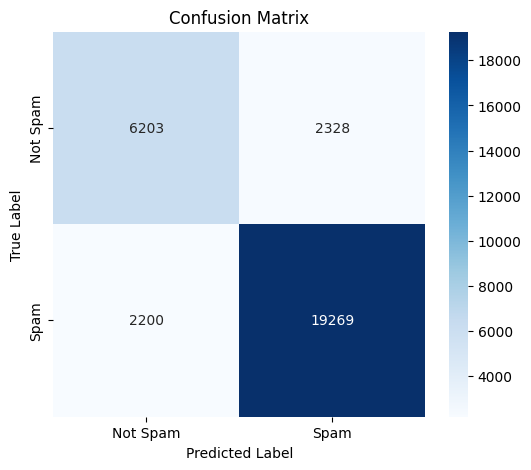

Accuracy: 0.8490666666666666
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      8531
           1       0.89      0.90      0.89     21469

    accuracy                           0.85     30000
   macro avg       0.82      0.81      0.81     30000
weighted avg       0.85      0.85      0.85     30000



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Generate predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


## 💾 Saving & Loading Machine Learning Models  

### 🔍 Overview  
These functions allow us to **save and load machine learning models** using **Pickle**, ensuring that models can be stored and reused without retraining.

### ⚡ Key Features  
✔ **Efficient Model Storage** – Saves trained models as `.pkl` files for future use.  
✔ **Quick Model Loading** – Loads previously saved models instantly without retraining.  
✔ **Reusable in Deployment** – Helps integrate models into **APIs, applications, or production environments**.  

### 🚀 Why This is Important?  
- **Saves Time & Compute Resources** – No need to retrain the model every time.  
- **Makes Deployment Easier** – The saved model can be **directly used in an API or UI**.  
- **Supports Model Versioning** – Enables **storing multiple trained models** for comparison and improvements.  

💡 **Next Step:** Use `save_model()` to store trained models and `load_model()` to deploy them in a **real-world spam detection system**! 🚀  


In [11]:
import pickle

# Function to save a model
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {filename}")

# Function to load a model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    print(f"Model loaded from {filename}")
    return model

## 💾 Saving the Trained Spam Classifier  

### 🔍 Overview  
This step **saves the trained machine learning model** as a `.pkl` file so that it can be reused without retraining.  

### ⚡ Key Benefits  
✔ **Prevents Retraining** – No need to train the model from scratch every time.  
✔ **Enables Deployment** – The saved model can be **integrated into APIs or applications**.  
✔ **Supports Model Versioning** – Allows saving different versions for performance comparison.  

### 🚀 Why This is Important?  
- **Makes Spam Detection Efficient** – Load the trained model instantly for predictions.  
- **Deployable in Real-Time Systems** – Can be used in **email filtering applications**.  
- **Facilitates Continuous Improvement** – Store and compare different trained models.  

💡 **Next Step:** Load the model in an API or UI to classify emails in real time! 🚀  


In [ ]:
save_model(model, "spam_classifier.pkl")

## 🤖 Automating Email Spam Detection with Machine Learning  

### 🔍 Overview  
This pipeline **automates spam detection** by processing raw email text, extracting relevant features, and classifying emails using a **pre-trained machine learning model**.

### ⚡ Key Features  
✔ **Feature Extraction** – Converts raw emails into structured features like **word count, number of links, HTML presence, suspicious domains, and attachments**.  
✔ **Machine Learning Pipeline** – Uses `sklearn.Pipeline` to seamlessly **transform input data and classify it**.  
✔ **Pre-Trained Model Integration** – Loads a **previously trained spam classifier** (`spam_classifier.pkl`) to make real-time predictions.  

### 🚀 How It Works  
1️⃣ **Extracts email metadata** (sender, recipient, subject, body, date).  
2️⃣ **Computes security-related features** (spam score, suspicious links, fake domains).  
3️⃣ **Feeds extracted features into the trained model** for prediction.  
4️⃣ **Classifies the email as spam (1) or not spam (0)**.  

### 🛡️ Real-World Application  
- **Detects phishing attempts** with scam links and fake domains.  
- **Improves email security** by flagging high-risk emails.  
- **Can be integrated into a web or API-based spam filter**.  

💡 **Next Step:** Deploy this pipeline in a **Flask API or UI** for real-time spam detection! 🚀  


In [27]:
from uuid import uuid4
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
import pickle


def transform_email(message_text):
    """Transforms an email message into a DataFrame of features"""

    features = [
    "num_words", "num_links", "num_attachments", "num_suspicious_attachments",
    "has_html", "spam_score", "num_suspicious_links", "is_fake_domain",
    "is_missing_to", "num_recipients", "num_subject_words"
]
    email_text = message_text[0].strip()
    headers = extract_headers(email_text)
    
    data = {
        "email_id": str(uuid4()),  # Generate a unique ID
        "from": headers["from"],
        "to": headers["to"],
        "subject": headers["subject"],
        "date": headers["date"],
        "body": headers["body"],
        "num_words": count_words(email_text),
        "num_links": count_links_and_domains(email_text),
        "num_attachments": count_attachments(email_text),
        "num_suspicious_attachments": count_suspicious_attachments(email_text),
        "has_html": has_html(email_text),
        "spam_score": spam_score(email_text),
        "num_suspicious_links": count_suspicious_links(email_text),
        "is_fake_domain": is_fake_domain(email_text),
        "is_missing_to": is_missing_to(email_text),
        "num_recipients": count_recipients(email_text),
        "num_subject_words": count_subject_words(email_text),
    }
    return pd.DataFrame([data])[features].astype(int)


# Define a pipeline to process emails
email_pipeline = Pipeline([
    ("transformer", FunctionTransformer(transform_email)),
    ("classifier", load_model("spam_classifier.pkl"))  # Load a pre-trained model
])


email_text = """From: "Mega Lottery" <win@lotteryprize.com>
To: "Lucky Winner" <victim@example.com>
Subject: 🎉 Congratulations! You've Won $1,000,000! 🎉
MIME-Version: 1.0
Content-Type: text/html; charset=UTF-8

<html>
<body>
    <h2 style="color:red;">Congratulations!</h2>
    <p>Dear Valued User,</p>
    <p>You have been randomly selected as the <strong>grand prize winner</strong> of our 
    <b>$1,000,000 Mega Lottery!</b></p>

    <p>To claim your winnings, you must <b>verify your identity</b> by clicking the link below:</p>
    
    <p><a href="http://scamwebsite.com/claim-prize" style="color:blue; font-size:18px;">Claim Your Prize Now</a></p>

    <p>Hurry! This offer expires in <b>24 hours</b>!</p>

    <p>For security reasons, do not share this email.</p>
    
    <p>Best Regards,<br>
    <i>Mega Lottery Claims Department</i></p>
</body>
</html>
"""

prediction = email_pipeline.predict([email_text])  # Predict spam or not
print("Spam Prediction:", prediction)


Model loaded from spam_classifier.pkl
Spam Prediction: [1]
